# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
from pathlib import Path
from newsapi import NewsApiClient

import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
home = Path.home() / ".env"  # for pc 1/2
load_dotenv(dotenv_path=home)  # for pc 2/2

True

In [3]:
# Retrieve the News API key
api_key = os.getenv("news_api")

# Create the newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [30]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)

# Show the total number of news
print(bitcoin_news_en["totalResults"])

7630


In [31]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

# Show the total number of news
print(ethereum_news_en["totalResults"])

3243


In [32]:
# Create the Bitcoin sentiment scores DataFrame
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

bitcoin_en_df = create_df(bitcoin_news_en["articles"], "en")

In [33]:
# Create the Ethereum sentiment scores DataFrame
ethereum_en_df = create_df(ethereum_news_en["articles"], "en")

In [34]:
# Describe the Bitcoin Sentiment
print(bitcoin_en_df.describe())

                                           title  \
count                                         20   
unique                                        19   
top     Bitcoin plunges by a fifth - Reuters.com   
freq                                           2   

                                              description  \
count                                                  20   
unique                                                 19   
top     A computer scientist who has claimed to be the...   
freq                                                    2   

                                                     text        date language  
count                                                  20          20       20  
unique                                                 19          11        1  
top     Posted \r\nA computer scientist who has claime...  2021-12-04       en  
freq                                                    2           4       20  


In [35]:
# Describe the Ethereum Sentiment
print(ethereum_en_df.describe())

                                                    title  \
count                                                  20   
unique                                                 20   
top     DeFi: The peer-to-peer financial system based ...   
freq                                                    1   

                                              description  \
count                                                  20   
unique                                                 20   
top     Bitcoin, Ethereum, Bitcoin Cash and Litecoin a...   
freq                                                    1   

                                                     text        date language  
count                                                  20          20       20  
unique                                                 20          14        1  
top     Image source, Getty Images\r\nImage caption, T...  2021-11-19       en  
freq                                                    1       

### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [52]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from nltk.util import ngrams



In [53]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
print(stopwords.words('english'))

# Expand the default stopwords list if necessary


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [54]:
bitcoin_list=bitcoin_en_df["text"].astype(str).tolist()

ethereum_list=ethereum_en_df["text"].astype(str).tolist()

In [55]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    #sw = set(stopwords.words('english'))
    #regex = re.compile("[^a-zA-Z ]")
    #re_clean = regex.sub('', article)
    #words = word_tokenize(re_clean)
    #lem = [lemmatizer.lemmatize(word) for word in words]
    #output = [word.lower() for word in lem if word.lower() not in sw]
    #return output
        
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation from text
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Lemmatize words into root words

    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]


    return output

In [56]:
from collections import Counter

# Define the counter function
def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [57]:
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

In [60]:
# Create a new tokens column for Bitcoin
bitcoin_tokens=bigram_counter(bitcoin_list)
print(bitcoin_tokens)


               bigram  count
0      (char, posted)      5
1      (world, first)      4
2  (reuters, bitcoin)      4
3      (ear, earbuds)      3
4      (el, salvador)      3
5    (salvador, plan)      3
6       (plan, build)      3
7      (build, world)      3
8    (first, bitcoin)      3
9     (bitcoin, city)      3


In [62]:
# Create a new tokens column for Ethereum
ethereum_tokens=bigram_counter(ethereum_list)
print(ethereum_tokens)

                     bigram  count
0            (ear, earbuds)      3
1         (theater, accept)      2
2            (ethereum, ha)      2
3           (earlier, year)      2
4           (white, castle)      2
5                (ha, lost)      2
6  (decentralized, finance)      2
7        (claim, ownership)      1
8      (ownership, someone)      1
9       (someone, probably)      1


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [64]:
from collections import Counter
from nltk import ngrams

In [68]:
# Generate the Bitcoin N-grams where N=2
# bitcoin_counts = Counter(ngrams(processed, n=2))
# print(dict(bitcoin_counts))

In [70]:
# Generate the Ethereum N-grams where N=2
# ethereum_counts = Counter(ngrams(processed, n=2))
# print(dict(ethereum_counts))

In [71]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [96]:
# Use token_count to get the top 10 words for Bitcoin
# print(dict(bitcoin_tokens.most_common(10)))

In [20]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [88]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

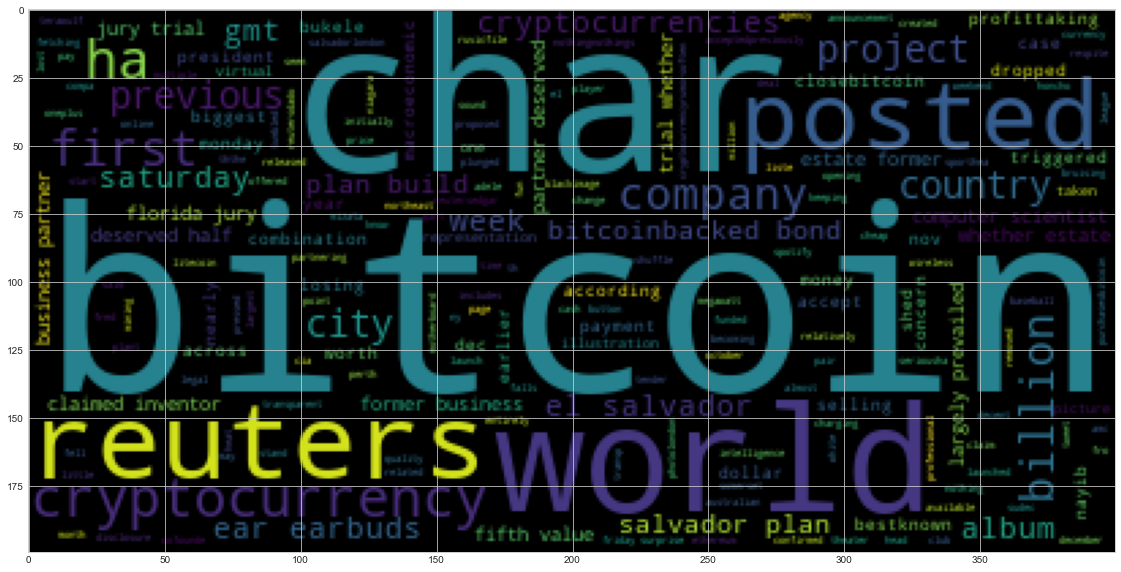

In [89]:
# Generate the Bitcoin word cloud
big_string = ' '.join(bitcoin_list)
input_text = process_text(big_string)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

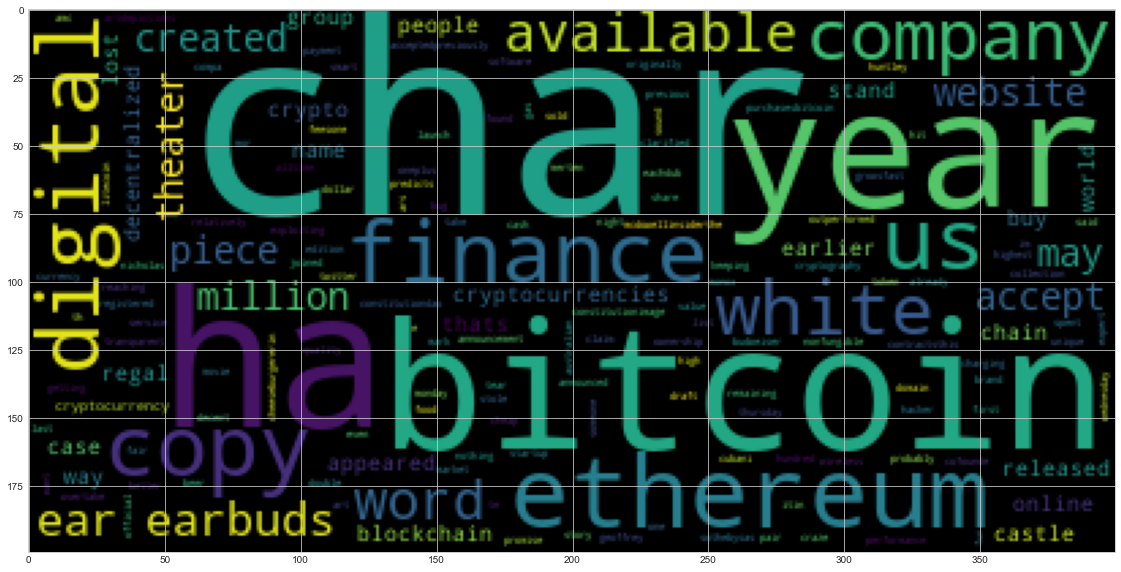

In [90]:
# Generate the Ethereum word cloud
big_string = ' '.join(ethereum_list)
input_text = process_text(big_string)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [76]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

In [77]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [93]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [97]:
# Concatenate all of the Bitcoin text together
all_btc_text = bitcoin_en_df["text"].str.cat()
all_btc_text

'The plant opening northeast of Niagara Falls this month, in Somerset, N.Y., is part of a $550 million project by Terawulf, a Bitcoin mining company. The project also includes a proposed 150-megawatt … [+1514 chars]Earlier this year, Nothing released a pair of relatively cheap $99 Ear 1 earbuds with a fun transparent case, wireless charging and decent sound quality. Now, the company (created by OnePlus cofounde… [+1395 chars]MIZATA, El Salvador/LONDON, Nov 22 (Reuters) - El Salvador plans to build the world\'s first "Bitcoin City" with money from a $1 billion bitcoin-backed bond the country\'s President Nayib Bukele said o… [+3147 chars]In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars]Posted \r\nAfter becoming the first country to accept the cryptocurrency as legal tender, El Salvador plans to build the world\'s f

In [99]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)


# Add a title to the document
# YOUR CODE HERE!

In [100]:
# Render NER visualization with displacy
displacy.render(doc, style='ent')

In [101]:
# List all Entities

print([ent.text for ent in doc.ents])

['Niagara Falls', 'this month', 'Somerset', 'N.Y.', '$550 million', 'Terawulf', 'Bitcoin', '150-megawatt', 'this year', '99', 'OnePlus', 'El Salvador/LONDON', 'Reuters', 'El Salvador', 'Bitcoin City', '$1 billion', 'Nayib Bukele', 'AMC', 'Bitcoin Cash', 'Litecoin', 'first', 'El Salvador', 'Bitcoin City', '99', 'December 13th', 'Nothings Ear', 'earlier this year', 'Monday', 'Florida', 'half', 'Adele', '30', 'Reuters', '8.4%', '49,228.82', 'GMT', 'Saturday', '4,514.87', 'Bitcoin', '28.7%', 'Baseball League', 'Perth Heat', 'first', 'Hea', 'Bitcoin', 'fifth', 'Saturday', 'nearly a billion dollars', 'Bitcoin', 'fifth', 'Saturday', 'nearly a billion dollars', '3', 'Reuters', '5.5%', '53,435.9', '22:04', 'GMT', 'Friday', '3,112.06', 'Bitcoin', '22.6%', 'Bitcoin', 'October 19, 2021', 'Edgar SuDec', 'Reuters', '9.29%', '48,752.15', 'GMT', 'almost 5%', 'Monday', 'the start of the week', 'one', 'fifth', 'El Salvador', 'Bitcoin City', '$1 billion', 'Nayib Bukele', 'CIA', 'Rumorsoften', 'this week'

---

### Ethereum NER

In [102]:
# Concatenate all of the Ethereum text together
all_eth_text = ethereum_en_df["text"].str.cat()
all_eth_text


'If you claim ownership, someone will probably want to take it\r\nIn what may be one of the better pieces of performance art this year, Australian Geoffrey Huntley has created a website that promises to… [+4542 chars]More than $1.2 million has already been spent on gas fees\r\nOne of 13 remaining copies of the Official Edition of the Constitution.\r\nImage: Sothebys\r\nAs of last Thursday night, ConstitutionDAO found i… [+5262 chars]In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars]Ethereum has been on a tear this year. Its outperformed bitcoin this year and has hit an all-time high. Ethereum has even won over people like Mark Cuban.\r\nI have my fair share of bitcoin, but Im mor… [+10978 chars]Blockchain startup MonoX Finance said on Wednesday that a hacker stole $31 million by exploiting a bug in software the ser

In [103]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)


# Add a title to the document
# YOUR CODE HERE!

In [104]:
# Render the visualization
displacy.render(doc, style='ent')

In [105]:
# List all Entities
print([ent.text for ent in doc.ents])

['Niagara Falls', 'this month', 'Somerset', 'N.Y.', '$550 million', 'Terawulf', 'Bitcoin', '150-megawatt', 'this year', '99', 'OnePlus', 'El Salvador/LONDON', 'Reuters', 'El Salvador', 'Bitcoin City', '$1 billion', 'Nayib Bukele', 'AMC', 'Bitcoin Cash', 'Litecoin', 'first', 'El Salvador', 'Bitcoin City', '99', 'December 13th', 'Nothings Ear', 'earlier this year', 'Monday', 'Florida', 'half', 'Adele', '30', 'Reuters', '8.4%', '49,228.82', 'GMT', 'Saturday', '4,514.87', 'Bitcoin', '28.7%', 'Baseball League', 'Perth Heat', 'first', 'Hea', 'Bitcoin', 'fifth', 'Saturday', 'nearly a billion dollars', 'Bitcoin', 'fifth', 'Saturday', 'nearly a billion dollars', '3', 'Reuters', '5.5%', '53,435.9', '22:04', 'GMT', 'Friday', '3,112.06', 'Bitcoin', '22.6%', 'Bitcoin', 'October 19, 2021', 'Edgar SuDec', 'Reuters', '9.29%', '48,752.15', 'GMT', 'almost 5%', 'Monday', 'the start of the week', 'one', 'fifth', 'El Salvador', 'Bitcoin City', '$1 billion', 'Nayib Bukele', 'CIA', 'Rumorsoften', 'this week'

---